In [1]:
directory = "data/Indian-monuments/images/train"

In [2]:
import os


base_path = os.path.abspath(directory)

class_folders = os.listdir(base_path)

print("Classes (folders):")

for class_name in class_folders:

    print(class_name)

Classes (folders):
Ajanta Caves
alai_darwaza
alai_minar
basilica_of_bom_jesus
Charar-E- Sharif
charminar
Chhota_Imambara
Ellora Caves
Fatehpur Sikri
Gateway of India
golden temple
hawa mahal pics
Humayun_s Tomb
India gate pics
iron_pillar
jamali_kamali_tomb
Khajuraho
lotus_temple
mysore_palace
qutub_minar
Sun Temple Konark
tajmahal
tanjavur temple
victoria memorial


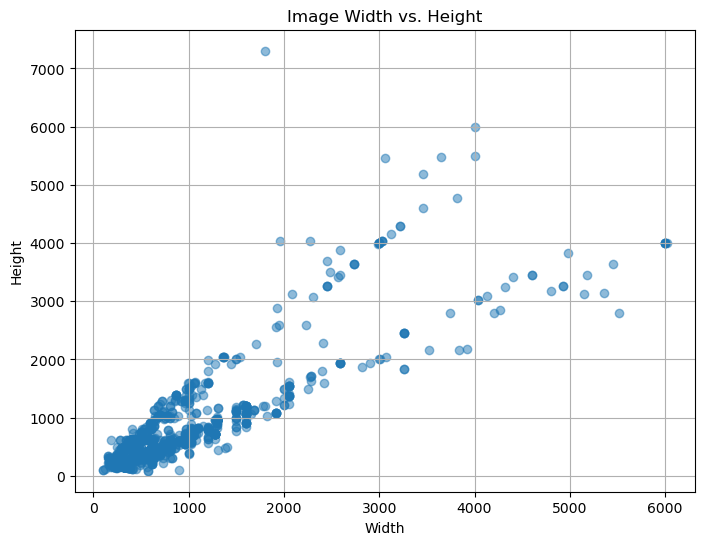

In [3]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

base_path = os.path.abspath(directory)
class_folders = os.listdir(base_path)

image_sizes = []

for class_name in class_folders:
    class_path = os.path.join(base_path, class_name)
    for image_file in os.listdir(class_path):
        try:
            image_path = os.path.join(class_path, image_file)
            image = tf.keras.preprocessing.image.load_img(image_path)
            width, height = image.size
            image_sizes.append((width, height))
        except:
            pass

image_sizes = np.array(image_sizes)

plt.figure(figsize=(8, 6))
plt.scatter(image_sizes[:, 0], image_sizes[:, 1], alpha=0.5)
plt.title("Image Width vs. Height")
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid(True)
plt.show()

In [4]:
import tensorflow as tf
from collections import Counter
import numpy as np

base_path = os.path.abspath(directory)
class_folders = os.listdir(base_path)
images = []
labels = []
class_counts = Counter()
for class_name in class_folders:
    class_path = os.path.join(base_path, class_name)
    for image_file in os.listdir(class_path):
        try:
            image_path = os.path.join(class_path, image_file)
            image = tf.keras.preprocessing.image.load_img(
                image_path, target_size=(224, 224)
            )  # image sizes varied so resizing.
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(class_name)
            class_counts[class_name] += 1
        except:
            pass

X = np.array(images)
y = labels
print("Images shape:", X[0].shape)
print("Labels:", y)
print("Number of images loaded in each class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Images shape: (224, 224, 3)
Labels: ['Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Aj

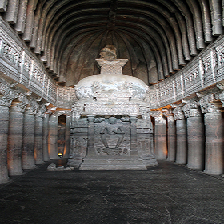

Ajanta Caves


In [5]:
# viewing one of the loaded images
from IPython.display import display
from PIL import Image

image_index = 0
pil_image = Image.fromarray(X[image_index].astype("uint8"))
display(pil_image)
print(y[0])

In [6]:
# image shape
print(X.shape)
print(X[1].shape)

(3746, 224, 224, 3)
(224, 224, 3)


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training, validation, and testing sets
X_train, X_val_test, y_train_encoded, y_val_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y
)
X_test, X_val, y_test_encoded, y_val_encoded = train_test_split(
    X_val_test, y_val_test_encoded, test_size=0.5, random_state=42
)

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [8]:
print("Train: ", len(X_train), len(y_train_encoded))
print("Test: ", len(X_test), len(y_test_encoded))
print("Val: ", len(X_val), len(y_val_encoded))

Train:  2996 2996
Test:  375 375
Val:  375 375


In [9]:
# Define the model
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(len(label_encoder.classes_), activation="softmax"),  # multiclass
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    X_train,
    y_train_encoded,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val_encoded),
)
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")

C:\Users\CHARVI UPRETI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 97s 897ms/step - accuracy: 0.1170 - loss: 7.8982 - val_accuracy: 0.3253 - val_loss: 2.3897
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.4465 - loss: 1.9613 - val_accuracy: 0.4427 - val_loss: 2.1142
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.7619 - loss: 0.7772 - val_accuracy: 0.5120 - val_loss: 2.1582
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9361 - loss: 0.2399 - val_accuracy: 0.5147 - val_loss: 2.8526
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 908ms/step - accuracy: 0.9777 - loss: 0.0911 - val_accuracy: 0.5253 - val_loss: 2.8197
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9888 - loss: 0.0607 - val_accuracy: 0.5200 - val_loss: 2.9696
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9892 - loss: 0.0501 - val_accuracy: 0.5387 - val_loss: 3.0435
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 94s 997ms/step - accuracy: 0.9966 - loss: 0.0257 - val_accuracy: 0.5253 -

In [10]:
model.save("try1.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 346112)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   177,209,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 531,946,250 (1.98 GB)

 Trainable params: 177,315,416 (676.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 354,630,834 (1.32 GB)

In [11]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image

image_path = "C:/Users/Charvi Upreti/Documents/GitHub/Unveiling-India-s-Heritage/data/Indian-monuments/images/train/tajmahal/10.jpg"

img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
predictions = model.predict(img_array)
class_folders = os.listdir(base_path)
predicted_class_index = np.argmax(predictions)
predicted_class = class_folders[predicted_class_index]

print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
Predicted class: tajmahal
